## Загрузим данные

In [ ]:
import pandas as pd

In [4]:
data = pd.read_csv('data.csv', ';')

In [5]:
data.head()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
0,156,20,1903,176,"0,416104363472785","0,535762483130904",1125,"749,966084023684",1
1,17,37,258,20,"0,211678832116788","0,430656934306569",157,"2289,03242434015",0
2,78,56,1956,185,"0,349475383373688","0,476594027441485",1195,"1423,37651183958",1
3,14,70,378,19,"0,318718381112985","0,463743676222597",206,"3396,56608856838",0
4,111,90,4089,90,"0,55617545209696","0,490573297422085",2934,"1576,51415402623",1


## 1. Рассмотрим статистики по нашим данным

In [12]:
data.describe()

,AddressCount,CallsCount,ClicksCount,FirmsCount,UsersCount,IsGeo
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1048.037975,3648.683544,21826.012658,305.088608,9753.126582,0.354430
std,1642.066119,8124.105402,32474.959513,382.052090,13927.295721,0.481397
min,9.000000,20.000000,258.000000,14.000000,157.000000,0.000000
25%,81.000000,346.000000,2055.000000,71.500000,1167.500000,0.000000
50%,371.000000,931.000000,6921.000000,185.000000,2934.000000,0.000000
75%,1195.000000,2457.500000,30625.500000,402.500000,13265.000000,1.000000
max,9552.000000,48497.000000,167155.000000,2379.000000,61127.000000,1.000000


In [9]:
data['IsGeo'].sum() / 79

0.35443037974683544

## 2. Рассмотрим более подробно признак "Calls Count"

In [13]:
new_data = data.drop(['AddressCount', 'ClicksCount', 'FirmsCount', 'UsersCount',
                      'GeoPart', 'MobilePart', 'Distance'], axis='columns')

In [14]:
new_data.head()

,CallsCount,IsGeo
0,20,1
1,37,0
2,56,1
3,70,0
4,90,1


In [15]:
import matplotlib.pyplot as plt

Посмотрим на график вариационного ряда признака

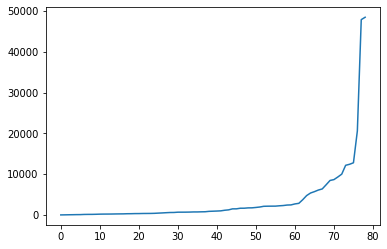

In [20]:
plt.plot(new_data['CallsCount'])


### Обратимся к более показательным графикам:

#### Box plot:

{'whiskers': [<matplotlib.lines.Line2D at 0x22cd793fcc8>,
 'caps': [<matplotlib.lines.Line2D at 0x22cd793fe48>,
 'boxes': [<matplotlib.lines.Line2D at 0x22cd793f688>],
 'medians': [<matplotlib.lines.Line2D at 0x22cd7942e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x22cd7942ec8>],
 'means': []}

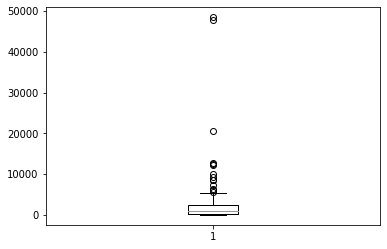

In [21]:
plt.boxplot(new_data['CallsCount'])

На данном графике мы видим, что есть 2(+1) больших выброса. Рассмотрим гистограмму:

(array([41., 11., 10.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,  1.,  0.,  2.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([2.000000e+01, 9.895400e+02, 1.959080e+03, 2.928620e+03,
        3.898160e+03, 4.867700e+03, 5.837240e+03, 6.806780e+03,
        7.776320e+03, 8.745860e+03, 9.715400e+03, 1.068494e+04,
        1.165448e+04, 1.262402e+04, 1.359356e+04, 1.456310e+04,
        1.553264e+04, 1.650218e+04, 1.747172e+04, 1.844126e+04,
        1.941080e+04, 2.038034e+04, 2.134988e+04, 2.231942e+04,
        2.328896e+04, 2.425850e+04, 2.522804e+04, 2.619758e+04,
        2.716712e+04, 2.813666e+04, 2.910620e+04, 3.007574e+04,
        3.104528e+04, 3.201482e+04, 3.298436e+04, 3.395390e+04,
        3.492344e+04, 3.589298e+04, 3.686252e+04, 3.783206e+04,
        3.880160e+04, 3.977114e+04, 4.074068e+04, 4.171022e+04,
        4.26

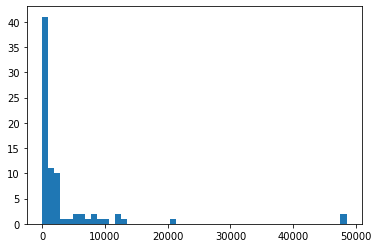

In [34]:
plt.hist(new_data['CallsCount'], bins='auto')

Попробуем предположить, что это связано с миксом в данных(т.е в зависимости от IsGeo мы имеем разные распределения)

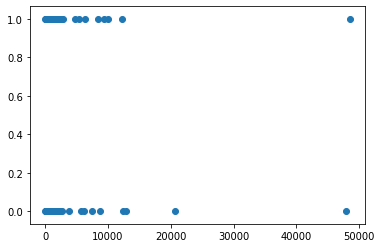

In [40]:
plt.scatter(new_data['CallsCount'], new_data['IsGeo'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22cd9bbaf88>,
 'caps': [<matplotlib.lines.Line2D at 0x22cd9bc3d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x22cd9bc3648>],
 'medians': [<matplotlib.lines.Line2D at 0x22cd9bc9d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x22cd9bc9e08>],
 'means': []}

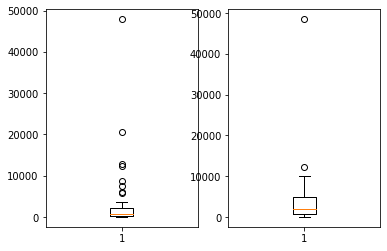

In [51]:
_, (ax1, ax2) = plt.subplots(ncols=2)
ax1.boxplot(new_data[new_data['IsGeo'] == 0]['CallsCount'])
ax2.boxplot(new_data[new_data['IsGeo'] == 1]['CallsCount'])

Заметим, что для обоих распределений точки > 20000 являются выбросами.

(array([19.,  3.,  1.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.]),
 array([2.00000000e+01, 2.71316667e+03, 5.40633333e+03, 8.09950000e+03,
        1.07926667e+04, 1.34858333e+04, 1.61790000e+04, 1.88721667e+04,
        2.15653333e+04, 2.42585000e+04, 2.69516667e+04, 2.96448333e+04,
        3.23380000e+04, 3.50311667e+04, 3.77243333e+04, 4.04175000e+04,
        4.31106667e+04, 4.58038333e+04, 4.84970000e+04]),
 <a list of 18 Patch objects>)

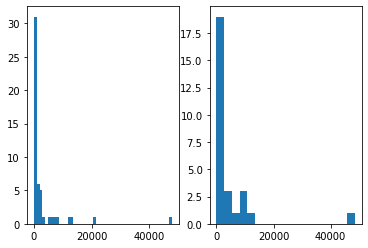

In [53]:
_, (ax1, ax2) = plt.subplots(ncols=2)
ax1.hist(new_data[new_data['IsGeo'] == 0]['CallsCount'], bins='auto')
ax2.hist(new_data[new_data['IsGeo'] == 1]['CallsCount'], bins='auto')

По графику с 'IsGeo'==1 мы можем предположить гамма распределение, по графикам с 'IsGeo'==0 и смеси этих 2 выборок мы не можем выдвинуть гипотезу об их распределении.

{'whiskers': [<matplotlib.lines.Line2D at 0x22cdaeb7c88>,
 'caps': [<matplotlib.lines.Line2D at 0x22cdaebcec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x22cdaeb7b88>],
 'medians': [<matplotlib.lines.Line2D at 0x22cdaebc988>],
 'fliers': [<matplotlib.lines.Line2D at 0x22cdaeb7548>],
 'means': []}

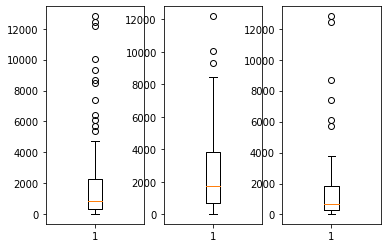

In [58]:
_, (ax1, ax2, ax3) = plt.subplots(ncols=3)
ax1.boxplot(new_data[new_data['CallsCount'] < 20000]['CallsCount'])
ax2.boxplot(new_data[(new_data['CallsCount'] < 20000) & (new_data['IsGeo'] == 1)]['CallsCount'])
ax3.boxplot(new_data[(new_data['CallsCount'] < 20000) & (new_data['IsGeo'] == 0)]['CallsCount'])

Поскольку в данных много выбросов, логично оценить их центр и вариативность с помощью медианы и межквартильного размаха.

### Сравним более подробно по признаку "IsGeo"

Text(0.5, 1.0, 'IsGeo = 0')

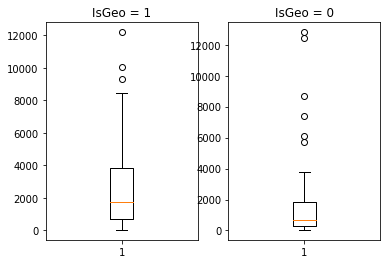

In [62]:
_, (ax2, ax3) = plt.subplots(ncols=2)
ax2.boxplot(new_data[(new_data['CallsCount'] < 20000) & (new_data['IsGeo'] == 1)]['CallsCount'])
ax2.set_title('IsGeo = 1')
ax3.boxplot(new_data[(new_data['CallsCount'] < 20000) & (new_data['IsGeo'] == 0)]['CallsCount'])
ax3.set_title('IsGeo = 0')

Судя по графикам мы можем заметить, что при показателе IsGeo=1 наши значения в среднем больше, чем при IsGeo=0. Построим гистограммы.

Text(0.5, 1.0, 'IsGeo = 0')

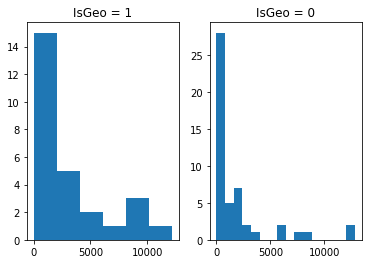

In [64]:
_, (ax1, ax2) = plt.subplots(ncols=2)
ax1.hist(new_data[(new_data['CallsCount'] < 20000) & (new_data['IsGeo'] == 1)]['CallsCount'], bins='auto')
ax1.set_title('IsGeo = 1')
ax2.hist(new_data[(new_data['CallsCount'] < 20000) & (new_data['IsGeo'] == 0)]['CallsCount'], bins='auto')
ax2.set_title('IsGeo = 0')

Расчитаем основные статистики на этих выборках.

In [67]:
new_data[(new_data['CallsCount'] < 20000) & (new_data['IsGeo'] == 1)]['CallsCount'].describe()


count       27.000000
mean      2959.444444
std       3435.463101
min         20.000000
25%        680.000000
50%       1744.000000
75%       3809.500000
max      12189.000000
Name: CallsCount, dtype: float64

In [69]:
new_data[(new_data['CallsCount'] < 20000) & (new_data['IsGeo'] == 0)]['CallsCount'].describe()

count       49.000000
mean      1863.734694
std       2936.887828
min         37.000000
25%        319.000000
50%        692.000000
75%       1849.000000
max      12805.000000
Name: CallsCount, dtype: float64

По статистикам мы тоже можем сказать, что при "IsGeo"==0 распределение притянуто к левой части. Это мы можем сказать по 50, 75 перцентилям и средней.

Мы можем предположить, что при значениях > 5000 показатель "IsGeo" маловероятно равен единице, поэтому стоит проверить данные с большим показателем на наличие ошибок. Также мы можем сказать, что наши распределения имеют несколько различное распределение, хотя и похожи по форме.  